# Physics 300 
## Computational Physics I (Fall 2018)
## BPB-248, Mon/Wed 02:30 - 03:45 pm 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Mon/Wed 03:45 - 05:00 pm |


# 8 Fitting
Curve fitting is another type of things heavily used in solving physics problems. 
Similar to interpolation, it attempts to approximate some function based on some given data points.
However, the criteria are different, 
- interpolation does not change the values on the given data points
- fitting attempts to use a general function to describe the whole picture, the values on the given data points 
are subject to change.

Being said, there are a lot of common mathematics between intopolation and fitting.


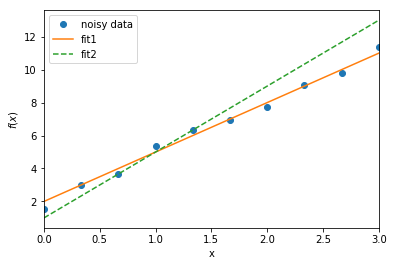

In [32]:
import matplotlib.pyplot as plt
import numpy as np

#define the function
f = lambda x: 3*x+2

#define the paramters for the plot
a,b = 0,3
npoints = 10

x = np.linspace(a,b,npoints)
y = f(x) + np.random.rand(npoints) - 0.5

plt.plot(x,y, 'o', label='noisy data')
plt.plot(x,f(x), '-', label='fit1')
plt.plot(x,4*x+1, '--', label='fit2')

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.legend()
plt.show()


## 8.1 Fitting criterion

Again, let's start with something simple. 
Suppose we have a series of points,

$$(x_1, y_1), (x_2, y_2), (x_3, y_3), ... (x_{n-1}, y_{n-1}), (x_n, y_n)$$


We want to draw a straight line $f(x) = ax+b$ to describe these points best, we can choose any number for $a$ and $b$.
What is the best criterion?

We can estimate the error as follows

$$\text{err} = \sum(y_i - f(x_i))^2$$

Our fit is a straight line, so 

$$\text{err} = \sum(y_i - (ax_i + b))^2 $$

The best line has minimum error between line and data points.

This is called the _least squares approach_, the goal is to find the minimum value of __err__.

To slove it, we simply just need to find the point where 

$$\frac{\partial{\text{err}}}{\partial a} = -2\sum_i^n x_i (y_i - ax_i -b) = 0$$

and 

$$\frac{\partial{\text{err}}}{\partial b} = -2\sum_i^n (y_i - ax_i -b) = 0$$

These two equations could be rewritten as 

$$a\sum x_i^2 + b\sum x_i = \sum(x_iy_i)$$
and
$$a\sum x_i + bn = \sum{y_i}$$

if you like the matrix form, it can be more convenient

$$
\begin{bmatrix}
       n     & \sum x_i    \\
    \sum x_i & \sum x_i^2  \\
\end{bmatrix}
\begin{bmatrix}
       b \\
       a \\
\end{bmatrix}
=
\begin{bmatrix}
      \sum y_i \\
      \sum (x_iy_i)\\
\end{bmatrix}
$$

So this is basically a problem to solve Ax = B

For polynomial fitting, this scheme could be generallized as follows,
    
$$
\begin{pmatrix}
       n       & \sum x_i       & \sum x_i^2     &... &\sum x_i^j     \\
    \sum x_i   & \sum x_i^2     & \sum x_i^3     &... &\sum x_i^{j+1} \\
    \sum x_i^2 & \sum x_i^3     & \sum x_i^4     &... &\sum x_i^{j+2} \\
               &                &                &... &\\
    \sum x_i^j & \sum x_i^{j+1} & \sum x_i^{j+2} &... &\sum x_i^{j+j} 
\end{pmatrix}
\begin{pmatrix}
    a_0   \\
    a_1   \\
    a_2   \\
     ...  \\
    a_j 
\end{pmatrix}
=
\begin{pmatrix}
    \sum y_i   \\
    \sum (x_iy_i)   \\
    \sum (x_i^2y_i) \\
            ...   \\
    \sum (x_i^jy_i) 
\end{pmatrix}
$$

## 8.2 Polynomial fitting

Use with p = np.polyfit(x, y, pOrder) and np.ployval(p, x)
- Set your given x and y data
- Get a polyfit
- Evaluate the polynomial using polyval



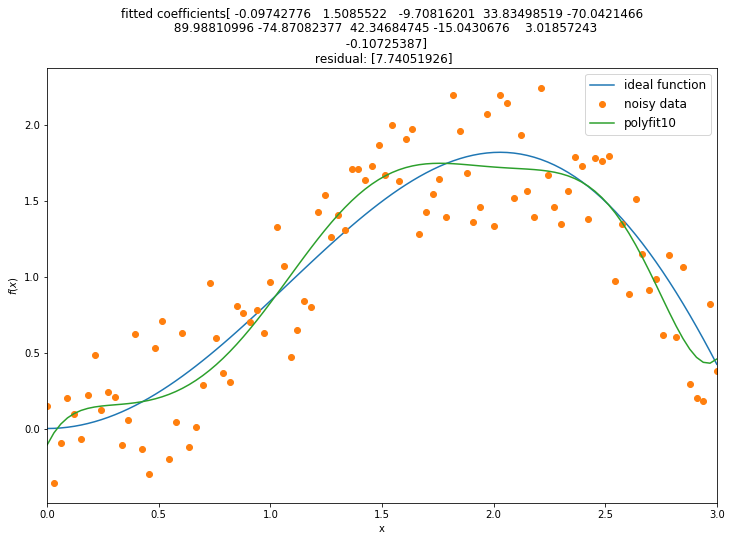

In [37]:
%matplotlib inline  

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[12, 8])
#define the function
f = lambda x: x * np.sin(x)  

#define the paramters for the plot
a,b = 0,3
npoints = 100
order = 10

x = np.linspace(a,b,npoints)
y = f(x) + np.random.rand(npoints) - 0.5

fit = np.polyfit(x, y, order, full=True)
y_p = np.polyval(fit[0], x)

plt.plot(x,f(x), label='ideal function')
plt.plot(x,y, 'o', label='noisy data')
plt.plot(x,y_p, label='polyfit'+str(order))

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.legend(fontsize=12)
plt.title('fitted coefficients' + str(fit[0]) + '\n residual: ' + str(fit[1]))
plt.show()
#plt.text(2, 2, fit)


# Quiz:
try to run the code with different polynomial function, and determine which polynomial yields the best fit.

In [38]:
help(np.polyfit)

Help on function polyfit in module numpy.lib.polynomial:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting polynomial
    rcond : float, optional
        Relative condition number of the fit. Singular values smaller than
        this relative to the largest singular value will be ignored. The
        default value is len(x)*eps, where eps is the

## 8.3 General curve fitting

We can fit a general function f(x; a, b, c) where f is a function of x with parameters a, b, c
that we want to optimize for a set of given data

This function is available from scipy.optimize.

Below is a example to fit a function $f(x)$ with the following expression

$$f(x) = a \text{exp}(-bx) + c$$

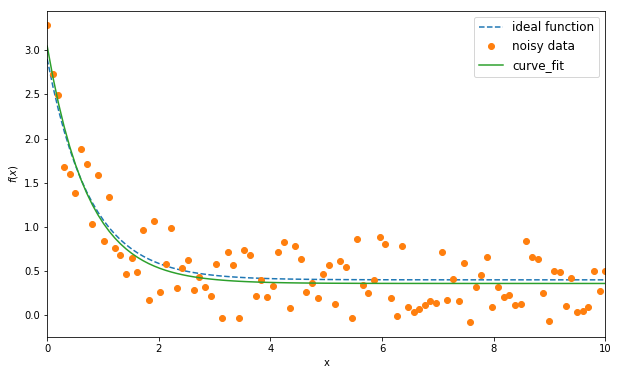

original coefficients:  2.500,  1.300,  0.400
fitted   coefficients:  2.686,  1.364,  0.359


In [43]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[10, 6])


#define the function
f = lambda x,a,b,c: a*np.exp(-b*x)+c  

#define the paramters for the plot
x_min, x_max = 0, 10
npoints = 100
a,b,c = 2.5, 1.3, 0.4

x = np.linspace(x_min, x_max, npoints)
y = f(x,a,b,c) + np.random.rand(npoints) - 0.5

#do the curve fit
params, extras = curve_fit(f, x, y)

plt.plot(x,f(x,a,b,c), '--', label='ideal function')
plt.plot(x,y, 'o', label='noisy data')
plt.plot(x,f(x,params[0],params[1],params[2]), label='curve_fit')

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([x_min, x_max])
plt.legend(fontsize=12)
plt.show()
print('original coefficients: %6.3f, %6.3f, %6.3f' %(a,b,c))
print('fitted   coefficients: %6.3f, %6.3f, %6.3f' %(params[0], params[1], params[2]))


## 8.4 Discussion

In the above section, we learned to use the _least squares distance_ to represent the closest fit. Is it always the best criterion? Any other proposals?

In scipy, there are a variety of definitions on distance.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html

https://www.cs.utah.edu/~jeffp/teaching/cs5955/L7-Distances.pdf

- $L_p$ distances
- cosine
- jaccard

The euclidean distance ($L_2$) is the mostly common used distance metrics, but by no means it is the only definition. 
Sometime, $L_1$ distance could work much better for different purposes. For example, $L_1$ has been widely used in 
a emerging algorithm dedicated to fast signal/image processing.
https://en.wikipedia.org/wiki/Compressed_sensing

## 8.5 Homework
Write your own program to do the followings
- generate a data with random noise
- choose different polynomial function to fit the data
- discuss which polynomial function yields the best fit and give your reasoning.